In [32]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
import seaborn as sns

In [33]:
# 01
df = pd.read_csv('C:/Users/DSADM/Desktop/Aula16Somativa/SomativaIABDRodrigo/dadosacoes.csv', sep=',')

In [34]:
df.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


Text(0.5, 1.0, 'Box plot Nome Ação x Valor de Mercado')

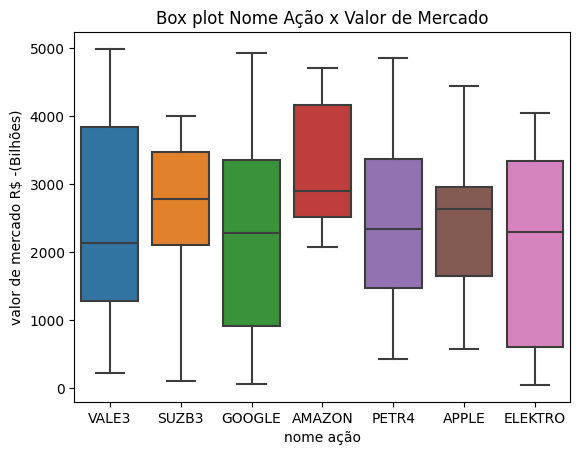

In [35]:
# 02
sns.boxplot(x=df['nome ação'],y=df['valor de mercado R$ -(Bilhões)']) 
plt.title('Box plot Nome Ação x Valor de Mercado')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [37]:
df.describe

<bound method NDFrame.describe of    nome ação  preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)
0      VALE3            194          45                            2134
1      SUZB3             91          71                            3069
2      SUZB3            165          41                            2815
3      SUZB3             56          34                            3613
4     GOOGLE            212           9                            2975
..       ...            ...         ...                             ...
95     SUZB3            208          78                            3035
96     VALE3            253          60                            3263
97    GOOGLE             99          35                             980
98     VALE3             82          43                            1866
99     VALE3            111          19                             230

[100 rows x 4 columns]>

In [38]:
# 03
dados_ativos = pd.get_dummies(df,columns=['nome ação'])

In [39]:
dados_ativos

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_AMAZON,nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,False,False,False,False,False,False,True
1,91,71,3069,False,False,False,False,False,True,False
2,165,41,2815,False,False,False,False,False,True,False
3,56,34,3613,False,False,False,False,False,True,False
4,212,9,2975,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
95,208,78,3035,False,False,False,False,False,True,False
96,253,60,3263,False,False,False,False,False,False,True
97,99,35,980,False,False,False,True,False,False,False
98,82,43,1866,False,False,False,False,False,False,True


In [40]:
# 04 - a
kmeans = KMeans(n_clusters=5) 
kmeans.fit(dados_ativos)

c:\Users\DSADM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [41]:
sse = kmeans.inertia_
print(sse)

8806410.121212121


In [42]:
# 04 - b
kmeans = KMeans(n_clusters=6) 
kmeans.fit(dados_ativos)

c:\Users\DSADM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [43]:
sse = kmeans.inertia_
print(sse)

5428809.327797203


In [44]:
# 05
labels = kmeans.labels_ 
centroids = kmeans.cluster_centers_


c:\Users\DSADM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


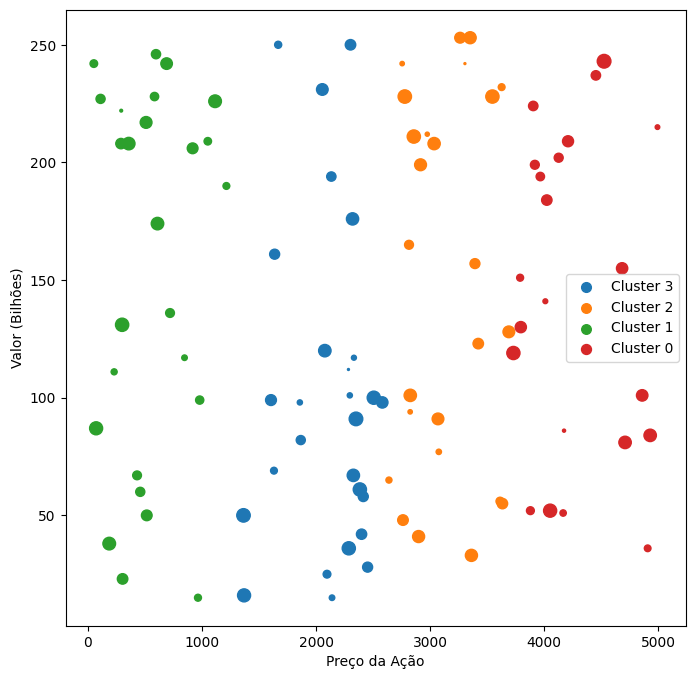

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           143.000000   49.772727                     4263.636364   
1           153.038462   50.307692                      553.961538   
2           149.680000   52.760000                     3137.320000   
3           101.740741   54.777778                     2101.259259   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.045455           0.136364          0.227273   
1               0.038462           0.230769          0.384615   
2               0.200000           0.080000          0.200000   
3               0.185185           0.074074          0.185185   

         nome ação_PETR4  nome ação_SUZB3  nome ação_VALE3  
Cluster                                                     
0               0.090909         0.045455         0.227273  
1    

In [59]:
# gráfico 2D com 4 clusteres
data = pd.get_dummies(df, columns=['nome ação'], drop_first=True)
features = data[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=4, random_state=0).fit(features)

data['Cluster'] = kmeans.labels_

# Visualizar os grupos em um gráfico tridimensional
fig = plt.figure(figsize=(8,8))

for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['valor de mercado R$ -(Bilhões)'], cluster_data['preço ação R$'], cluster_data['qtde cotas'], label=f'Cluster {cluster}')

plt.xlabel('Preço da Ação')
plt.ylabel('Valor (Bilhões)')
plt.title(f'')

plt.legend()
plt.show()

# Analisar os clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

c:\Users\DSADM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


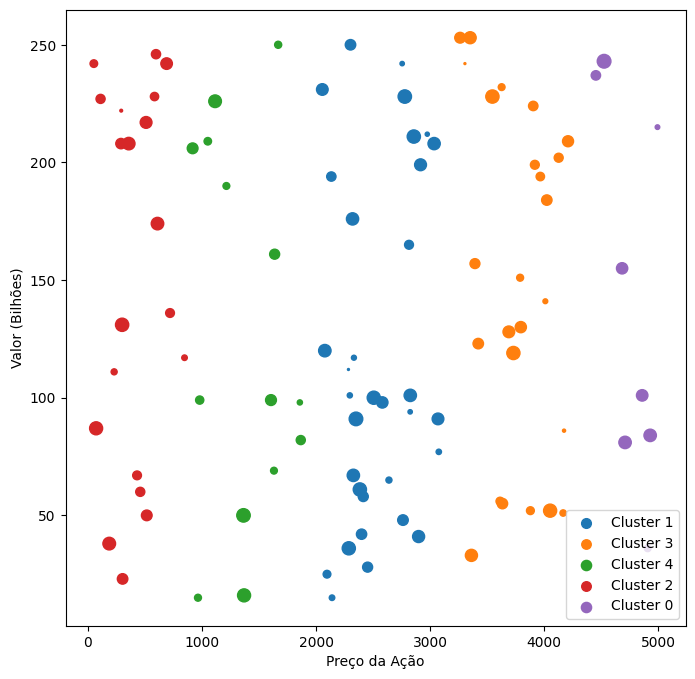

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           144.000000   58.875000                     4757.250000   
1           118.303030   54.515152                     2544.333333   
2           151.700000   52.600000                      408.000000   
3           150.160000   48.840000                     3757.920000   
4           126.428571   47.000000                     1374.357143   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.125000           0.000000          0.125000   
1               0.181818           0.090909          0.181818   
2               0.050000           0.300000          0.300000   
3               0.040000           0.160000          0.240000   
4               0.214286           0.000000          0.428571   

         nome ação_PETR4  nome ação_SUZB3  nome ação_

In [60]:
# gráfico 2D com 5 clusteres
data = pd.get_dummies(df, columns=['nome ação'], drop_first=True)
features = data[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(features)

data['Cluster'] = kmeans.labels_

# Visualizar os grupos em um gráfico tridimensional
fig = plt.figure(figsize=(8,8))

for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['valor de mercado R$ -(Bilhões)'], cluster_data['preço ação R$'], cluster_data['qtde cotas'], label=f'Cluster {cluster}')

plt.xlabel('Preço da Ação')
plt.ylabel('Valor (Bilhões)')
plt.title(f'')

plt.legend()
plt.show()

# Analisar os clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

c:\Users\DSADM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


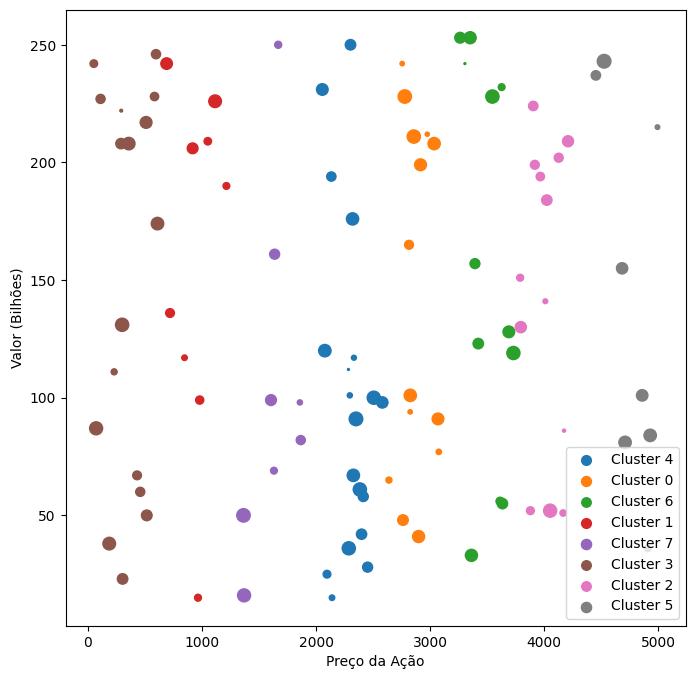

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           141.571429   51.571429                     2873.357143   
1           160.000000   42.333333                      944.444444   
2           144.230769   41.076923                     4000.923077   
3           149.352941   54.529412                      347.235294   
4           101.157895   56.684211                     2301.894737   
5           144.000000   58.875000                     4757.250000   
6           156.583333   57.250000                     3494.666667   
7           103.125000   50.250000                     1624.750000   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.285714           0.071429          0.214286   
1               0.000000           0.222222          0.444444   
2               0.000000           0.15

In [61]:
# gráfico 2D com 8 clusteres
data = pd.get_dummies(df, columns=['nome ação'], drop_first=True)
features = data[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=8, random_state=0).fit(features)

data['Cluster'] = kmeans.labels_

# Visualizar os grupos em um gráfico tridimensional
fig = plt.figure(figsize=(8,8))

for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['valor de mercado R$ -(Bilhões)'], cluster_data['preço ação R$'], cluster_data['qtde cotas'], label=f'Cluster {cluster}')

plt.xlabel('Preço da Ação')
plt.ylabel('Valor (Bilhões)')
plt.title(f'')

plt.legend()
plt.show()

# Analisar os clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

c:\Users\DSADM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


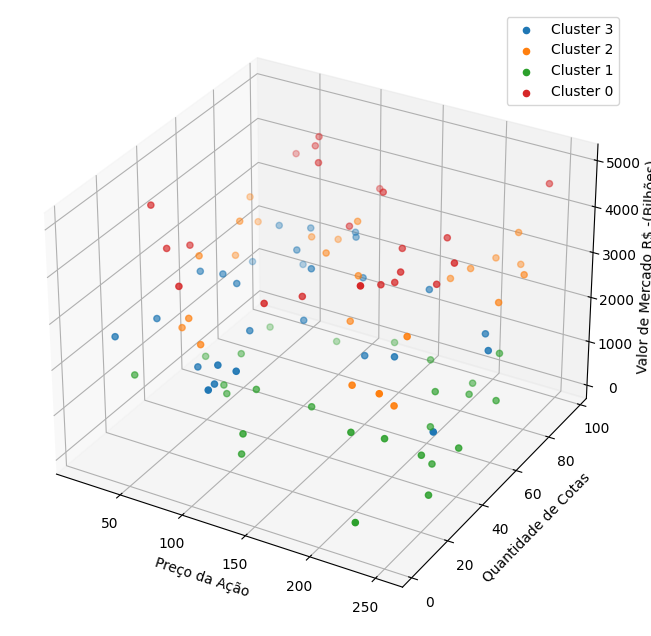

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           143.000000   49.772727                     4263.636364   
1           153.038462   50.307692                      553.961538   
2           149.680000   52.760000                     3137.320000   
3           101.740741   54.777778                     2101.259259   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.045455           0.136364          0.227273   
1               0.038462           0.230769          0.384615   
2               0.200000           0.080000          0.200000   
3               0.185185           0.074074          0.185185   

         nome ação_PETR4  nome ação_SUZB3  nome ação_VALE3  
Cluster                                                     
0               0.090909         0.045455         0.227273  
1    

In [62]:
# gráfico 3D com 4 clusteres
# Realizar o agrupamento com K-Means
data = pd.get_dummies(df, columns=['nome ação'], drop_first=True)
features = data[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=4, random_state=0).fit(features)

data['Cluster'] = kmeans.labels_

# Visualizar os grupos em um gráfico tridimensional
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(cluster_data['preço ação R$'], cluster_data['qtde cotas'], cluster_data['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')

ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado R$ -(Bilhões)')
ax.set_title(f'')

plt.legend()
plt.show()

# Analisar os clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

c:\Users\DSADM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


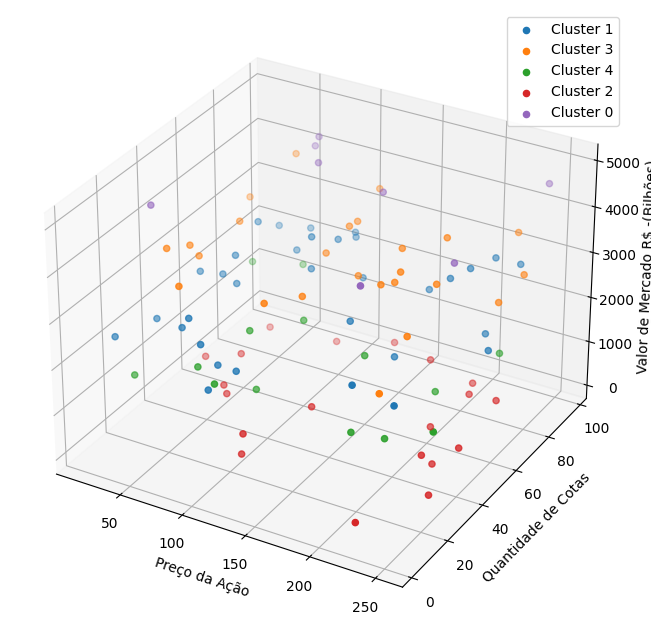

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           144.000000   58.875000                     4757.250000   
1           118.303030   54.515152                     2544.333333   
2           151.700000   52.600000                      408.000000   
3           150.160000   48.840000                     3757.920000   
4           126.428571   47.000000                     1374.357143   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.125000           0.000000          0.125000   
1               0.181818           0.090909          0.181818   
2               0.050000           0.300000          0.300000   
3               0.040000           0.160000          0.240000   
4               0.214286           0.000000          0.428571   

         nome ação_PETR4  nome ação_SUZB3  nome ação_

In [63]:
# gráfico 3D com 5 clusteres
# Realizar o agrupamento com K-Means
data = pd.get_dummies(df, columns=['nome ação'], drop_first=True)
features = data[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(features)

data['Cluster'] = kmeans.labels_

# Visualizar os grupos em um gráfico tridimensional
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(cluster_data['preço ação R$'], cluster_data['qtde cotas'], cluster_data['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')

ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado R$ -(Bilhões)')
ax.set_title(f'')

plt.legend()
plt.show()

# Analisar os clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

c:\Users\DSADM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


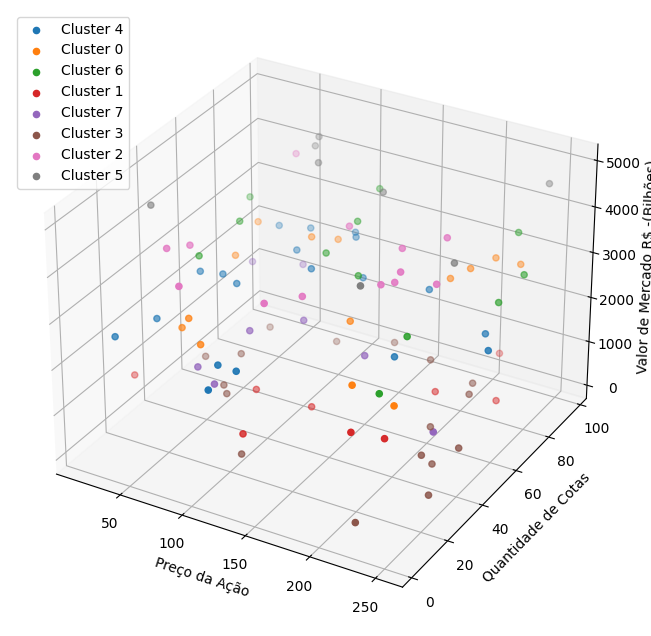

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           141.571429   51.571429                     2873.357143   
1           160.000000   42.333333                      944.444444   
2           144.230769   41.076923                     4000.923077   
3           149.352941   54.529412                      347.235294   
4           101.157895   56.684211                     2301.894737   
5           144.000000   58.875000                     4757.250000   
6           156.583333   57.250000                     3494.666667   
7           103.125000   50.250000                     1624.750000   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.285714           0.071429          0.214286   
1               0.000000           0.222222          0.444444   
2               0.000000           0.15

In [64]:
# gráfico 3D com 8 clusteres
# Realizar o agrupamento com K-Means
data = pd.get_dummies(df, columns=['nome ação'], drop_first=True)
features = data[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=8, random_state=0).fit(features)

data['Cluster'] = kmeans.labels_

# Visualizar os grupos em um gráfico tridimensional
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(cluster_data['preço ação R$'], cluster_data['qtde cotas'], cluster_data['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')

ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado R$ -(Bilhões)')
ax.set_title(f'')

plt.legend()
plt.show()

# Analisar os clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

O treinamento do aprendizado supervisionado pode levar muito tempo e exige conhecimentos do usuário para validar os rótulos — tanto para entradas quanto para saídas. A classificação de dados em massa representa muitos desafios no aprendizado supervisionado, contudo, após a rotulagem, os resultados são confiáveis.

Às vezes, o aprendizado não supervisionado produz resultados completamente equivocados, com exceção de alguma intervenção humana para validar os valores. Ao contrário do aprendizado supervisionado, ele pode processar qualquer volume de dados em tempo real, mas, como a máquina aprende sozinha, a visibilidade da classificação é menor. Com isso, aumenta a probabilidade de resultados insatisfatórios...

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
